Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 1s 80us/step - loss: 0.4738 - acc: 0.8031 - val_loss: 0.3241 - val_acc: 0.8722
Epoch 2/10
15000/15000 [==============================] - 1s 43us/step - loss: 0.2514 - acc: 0.9045 - val_loss: 0.2833 - val_acc: 0.8871
Epoch 3/10
15000/15000 [==============================] - 1s 43us/step - loss: 0.2002 - acc: 0.9239 - val_loss: 0.2958 - val_acc: 0.8838
Epoch 4/10
15000/15000 [==============================] - 1s 43us/step - loss: 0.1759 - acc: 0.9364 - val_loss: 0.3129 - val_acc: 0.8811
Epoch 5/10
15000/15000 [==============================] - 1s 43us/step - loss: 0.1544 - acc: 0.9449 - val_loss: 0.3416 - val_acc: 0.8776
Epoch 6/10
15000/15000 [==============================] - 1s 43us/step - loss: 0.1383 - acc: 0.9507 - val_loss: 0.3727 - val_acc: 0.8709
Epoch 7/10
15000/15000 [==============================] - 1s 43us/step - loss: 0.1243 - acc: 0.9550 - val_loss: 0.3949 - val_acc

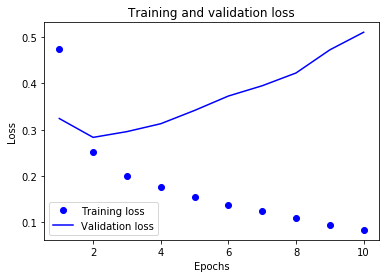

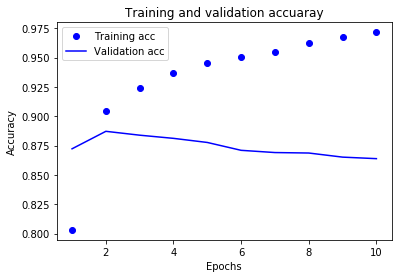

In [35]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Top 5000개의 단어만 불러오기
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=5000)

# 정수 시퀀스를 이진 행렬로 인코딩
def vectorize_sequence(sequences, dimension=5000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


# 모델 정의
model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(5000,)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


# 모델 컴파일
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])


# 모델 검증세트
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


# 모델 훈련
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=10,
                   batch_size=100,
                   validation_data=(x_val, y_val))


# 훈련과 검증 손실 그리기
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# 훈련과 검증 정확도 그리기
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuaray')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()




In [14]:
train_data[0].shape

(25000,)

In [10]:
max([len(data) for data in train_data])

2494

In [31]:
# 모델 재훈련
model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(5000,)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='mean_squared_error',
             metrics=['acc'])

model.fit(x_train, y_train, epochs=2, batch_size=100)
results = model.evaluate(x_test, y_test)

results

Epoch 1/2
25000/25000 [==============================] - 1s 37us/step - loss: 0.1275 - acc: 0.8404
Epoch 2/2
25000/25000 [==============================] - 1s 34us/step


[0.085984684715271, 0.884119987487793]

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 245us/step - loss: 0.5364 - acc: 0.7745 - val_loss: 0.4151 - val_acc: 0.8490
Epoch 2/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.3221 - acc: 0.9005 - val_loss: 0.3110 - val_acc: 0.8871
Epoch 3/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.2360 - acc: 0.9244 - val_loss: 0.3102 - val_acc: 0.8738
Epoch 4/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.1836 - acc: 0.9411 - val_loss: 0.2831 - val_acc: 0.8853
Epoch 5/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.1531 - acc: 0.9503 - val_loss: 0.2775 - val_acc: 0.8903
Epoch 6/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.1254 - acc: 0.9602 - val_loss: 0.2930 - val_acc: 0.8866
Epoch 7/20
15000/15000 [==============================] - 2s 162us/step - loss: 0.1035 - acc: 0.9680 - val_loss: 0.3046 - 

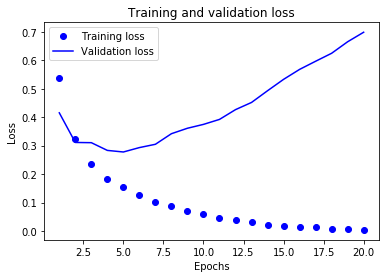

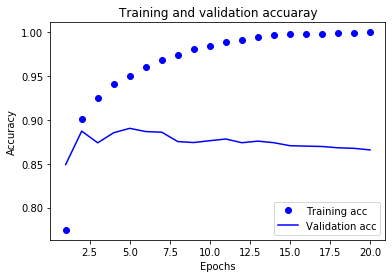

In [34]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Top 5000개의 단어만 불러오기
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# 정수 시퀀스를 이진 행렬로 인코딩
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


# 모델 정의
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


# 모델 컴파일
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])


# 모델 검증세트
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


# 모델 훈련
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))


# 훈련과 검증 손실 그리기
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# 훈련과 검증 정확도 그리기
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuaray')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



